<a href="https://colab.research.google.com/github/waassiim/CNN-with-TensorFlow/blob/main/CNN_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#importing necessary libraries
import numpy as np
import pandas as pd
import glob
import scipy.misc
import os
import shutil
import matplotlib.pyplot as plt
from PIL import Image
from shutil import copyfile
import random


In [5]:
#to use drive we need to execute this
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
root_dir="/content/data"
# Empty directory to prevent FileExistsError is the function is run several times
if os.path.exists(root_dir):
  shutil.rmtree(root_dir)
else:
  os.mkdir(root_dir)
#  FUNCTION: create_train_test_dirs to use them training and testing
def create_train_test_dirs(root_path):

  path_training = os.path.join(root_dir, "training")
  path_testing=os.path.join(root_dir, "testing")

  os.makedirs(path_training)
  os.makedirs(path_testing)
  os.makedirs(os.path.join(path_training,"yes"))
  os.makedirs(os.path.join(path_training,"no"))
  os.makedirs(os.path.join(path_testing,"yes"))
  os.makedirs(os.path.join(path_testing,"no"))

try:
  create_train_test_dirs(root_path=root_dir)
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")

In [7]:
#if the yes_dr or no_dr exist that means that is the second time u are runing this cell
yes_dr="/content/data/yes"
no_dr="/content/data/no"
if os.path.exists(yes_dr):
  shutil.rmtree(yes_dr)
else:
  os.mkdir(yes_dr)
if os.path.exists(no_dr):
  shutil.rmtree(no_dr)
else:
  os.mkdir(no_dr)

In [8]:
# Test your create_train_test_dirs function to show you all the dr in the root dr

for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

/content/data/testing
/content/data/yes
/content/data/no
/content/data/training
/content/data/testing/yes
/content/data/testing/no
/content/data/training/yes
/content/data/training/no


In [9]:

def is_supported_image(file_path):#this function will test each file and return true if this file is a image and false if not
    try:
        img = Image.open(file_path)
        img.verify()
        return True
    except (IOError, SyntaxError):
        return False

def count_and_delete_corrupted_and_not_supported_images(source):
    images_source = os.listdir(source)
    corrupted_images = 0
    not_supported_files = 0
    for image in images_source:
        image_path = os.path.join(source, image)
        if os.path.getsize(image_path) == 0:# if the size of the image is 0 that mean that this image is corrupted so we will deleted it
            corrupted_images += 1
            print(image_path)
            os.remove(image_path)
        elif not is_supported_image(image_path):
            not_supported_files += 1
            print(is_supported_image(image_path))
            print(image_path)
            os.remove(image_path)
    return corrupted_images, not_supported_files


In [10]:

source_yes="/content/drive/MyDrive/brain_tumor/yes"
source_no="/content/drive/MyDrive/brain_tumor/no"

# os.listdir to get the names of the files in the directory
# os.path.join to append the file names to the directory path
# shutil.copyfile to copy the files to the destination directory
def copy_files(source,destination):
  files = os.listdir(source)
  for f in files:
    shutil.copyfile(os.path.join(source, f), os.path.join(root_dir, destination, f))
copy_files(source_yes,yes_dr)
corrupted_images,not_supported_files=count_and_delete_corrupted_and_not_supported_images(yes_dr)
print(f"corrupted files in {yes_dr} : {corrupted_images} and not supported files {not_supported_files}")
copy_files(source_no,no_dr)
corrupted_images,not_supported_files=count_and_delete_corrupted_and_not_supported_images(no_dr)
print(f"corrupted files in {no_dr} : {corrupted_images} and not supported files {not_supported_files}")


corrupted files in /content/data/yes : 0 and not supported files 0
corrupted files in /content/data/no : 0 and not supported files 0


In [11]:
print(f"\n\nThere are {len(os.listdir(yes_dr))} images for brains that have tumors")
print(f"\n\nThere are {len(os.listdir(no_dr))} images for normal brains")



There are 155 images for brains that have tumors


There are 98 images for normal brains


In [12]:
def show_images(source):
    images = os.listdir(source)
    # Shuffle the list of images
    random.shuffle(images)
    # Display only the first 9 images
    images = images[:9]

    fig, axes = plt.subplots(3, 3, figsize=(10, 10))

    for i, ax in enumerate(axes.flat):
        if i < len(images):
            p = os.path.join(source, images[i])
            image = Image.open(p)
            ax.imshow(image)
            ax.axis('off')
            # Add the size of the image as text close to it
            size_text = f"Size: {image.size[0]}x{image.size[1]}"
            ax.text(0.5, -0.15, size_text, ha='center', va='center', transform=ax.transAxes, fontsize=10)
        else:
            # Hide the axes if there are fewer than 9 images
            ax.axis('off')

    plt.subplots_adjust(wspace=0.1, hspace=0.3)
    plt.show()

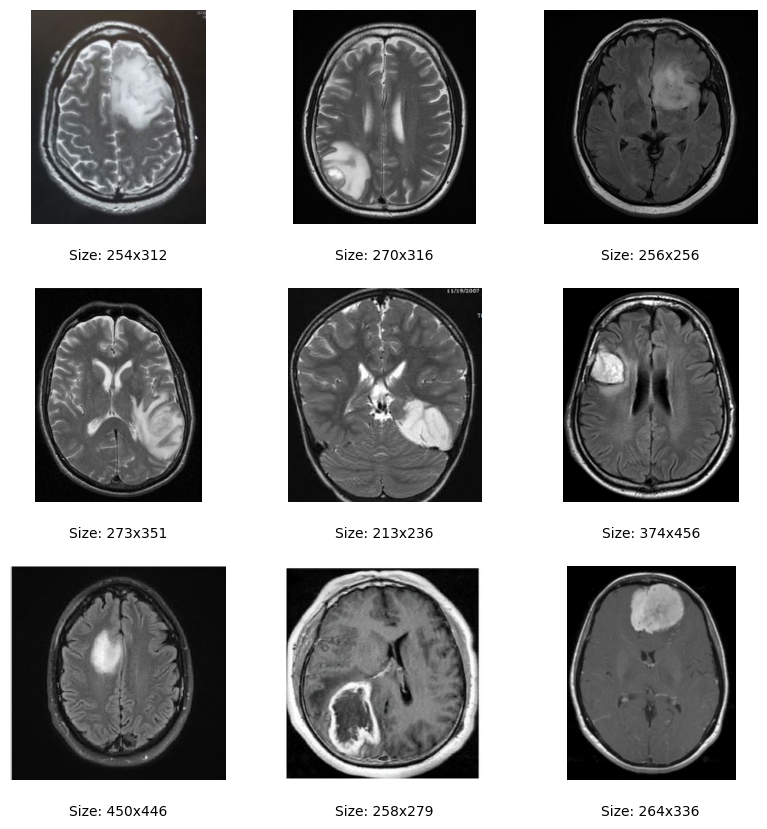

In [11]:
#show the images of brains that have tumor
show_images(yes_dr)

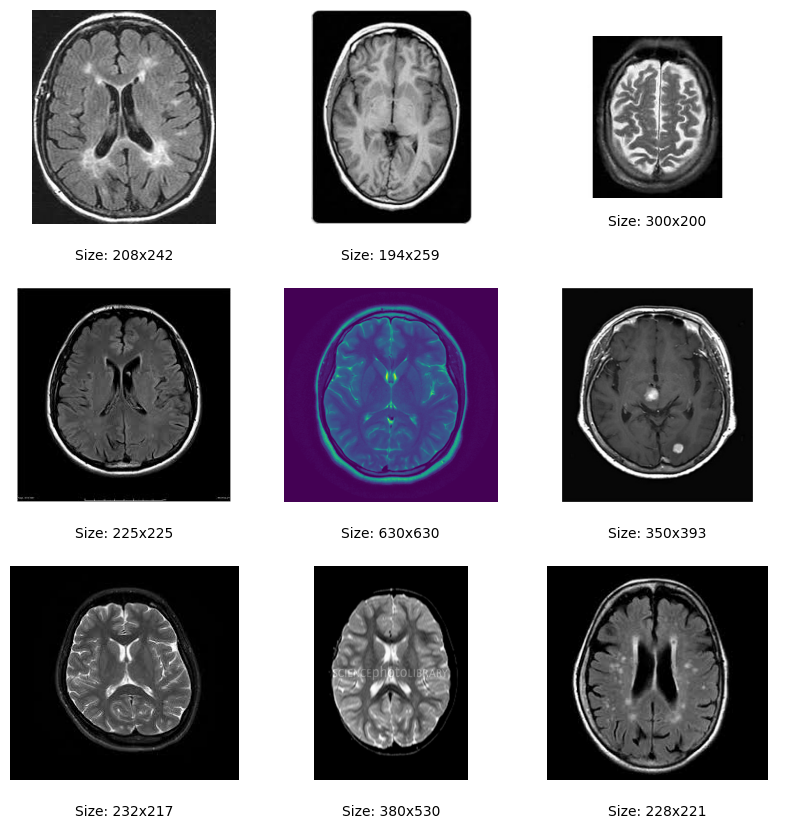

In [12]:
#show images for brain that doesn't have tumor
show_images(no_dr)

In [13]:
#this function will split the data to train and test
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
   l=os.listdir(SOURCE)
   l=random.sample(l ,len(l))
   s=0
   images_training=int(SPLIT_SIZE*len(l))
   for img in l:
      image_path=os.path.join(SOURCE,img)
      s=s+1
      if s<=images_training:
        copyfile( os.path.join( SOURCE,img) , os.path.join(TRAINING,img))
      else :
        copyfile( os.path.join( SOURCE,img), os.path.join(TESTING,img))

In [14]:


TRAINING_DIR = "/content/data/training"
TESTING_DIR = "/content/data/testing"

TRAINING_yes_dr= os.path.join(TRAINING_DIR, "yes")
TESTING_yes_dr = os.path.join(TESTING_DIR, "yes")

TRAINING_no_dr = os.path.join(TRAINING_DIR, "no")
TESTING_no_dr = os.path.join(TESTING_DIR, "no")

# Empty directories in case you run this cell multiple times
if len(os.listdir(TRAINING_yes_dr)) > 0:
  for file in os.scandir(TRAINING_yes_dr):
    os.remove(file.path)
if len(os.listdir(TRAINING_no_dr)) > 0:
  for file in os.scandir(TRAINING_no_dr):
    os.remove(file.path)
if len(os.listdir(TESTING_no_dr)) > 0:
  for file in os.scandir(TESTING_no_dr):
    os.remove(file.path)
if len(os.listdir(TESTING_yes_dr)) > 0:
  for file in os.scandir(TESTING_yes_dr):
    os.remove(file.path)
split_size = 0.85


split_data(yes_dr, TRAINING_yes_dr, TESTING_yes_dr, split_size)
split_data(no_dr, TRAINING_no_dr, TESTING_no_dr, split_size)

# Check that the number of images matches the expected output
print(f"\n\nThere are {len(os.listdir(TRAINING_yes_dr))} images of TRAINING_yes_dr")
print(f"There are {len(os.listdir(TRAINING_no_dr))} images of TRAINING_no_dr")
print(f"There are {len(os.listdir(TESTING_no_dr))} images of TESTING_no_dr")
print(f"There are {len(os.listdir(TESTING_yes_dr))} images of TESTING_yes_dr")



There are 131 images of TRAINING_yes_dr
There are 83 images of TRAINING_no_dr
There are 15 images of TESTING_no_dr
There are 24 images of TESTING_yes_dr


In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [16]:
TRAINING_DIR = "/content/data/training"
TESTING_DIR = "/content/data/testing"


In [33]:
# GRADED FUNCTION: train_val_generators
def train_val_generators(TRAINING_DIR, VALIDATION_DIR,shape):
  ### START CODE HERE

  # Instantiate the ImageDataGenerator class (don't forget to set the arguments to augment the images)
  train_datagen = ImageDataGenerator(rescale=1.0/255,
                                     rotation_range=30,
                                     width_shift_range=0.1,
                                     height_shift_range=0.1,
                                     shear_range=0.1,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest')

  # Pass in the appropriate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=8,
                                                      class_mode='binary',
                                                      target_size=shape,
                                                      color_mode='grayscale' )

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  validation_datagen = ImageDataGenerator(rescale=1.0/255)

  # Pass in the appropriate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=8,
                                                                class_mode="binary",
                                                                target_size=shape,
                                                                color_mode='grayscale')
  ### END CODE HERE
  return train_generator, validation_generator

In [34]:
train_dataset, test_dataset = train_val_generators(TRAINING_DIR, TESTING_DIR,(150,150))

Found 214 images belonging to 2 classes.
Found 39 images belonging to 2 classes.


In [ ]:
def image_dataset_from_directory(TRAINING_DIR, VALIDATION_DIR,shape):

  rescale_factor=tf.keras.layers.Rescaling(1./255)
  train_datst = tf.keras.utils.image_dataset_from_directory(directory=TRAINING_DIR,
    label_mode='binary',

    color_mode='rgb',
    batch_size=32,
    image_size=shape,
    shuffle=True,
    seed=42)
  val_dats = tf.keras.utils.image_dataset_from_directory(directory=VALIDATION_DIR,
    label_mode='binary',
    color_mode='rgb',
    batch_size=32,
    image_size=shape,
    shuffle=True,
    seed=42)
  train_datst = train_datst.map(lambda x, y: (rescale_factor(x), y))
  val_dats = val_dats.map(lambda x, y: (rescale_factor(x), y))
  return train_datst, val_dats

In [ ]:
train_dataset,validation_dataset=image_dataset_from_directory(TRAINING_DIR, TESTING_DIR,(150,150))

In [22]:
import tensorflow as tf

In [24]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow import keras


In [25]:
batch_size = 8
epochs = 100
# dimensions des images
img_rows, img_cols = 150, 150
input_shape = (img_rows, img_cols, 3)

In [26]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

In [27]:
# ModelCheckpoint to save model in case of interrupting the learning process
checkpoint = ModelCheckpoint("./brain_tumor.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only=True,
                             verbose=1)

# EarlyStopping to find best model with a large number of epochs
earlystop = EarlyStopping(monitor='val_loss',
                          restore_best_weights=True,
                          patience=5,  # number of epochs with no improvement after which training will be stopped
                          verbose=1)

callbacks = [earlystop, checkpoint]

In [37]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150*150 with 3 bytes color
    # This is the first convolution
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,1)),
    keras.layers.MaxPooling2D(2, 2),

    keras.layers.Conv2D(32, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.Conv2D(256, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),

    # Flatten the results to feed into a DNN
    keras.layers.Flatten(),
    # 1024 neuron hidden layer
    keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])




In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       36992     
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 256)      

In [39]:
history=model.fit(train_dataset,
          batch_size=32,
          epochs=50,
          verbose=1,
          callbacks=callbacks,
          validation_data=test_dataset)

Epoch 1/50
27/27 [==============================] - ETA: 0s - loss: 0.6675 - accuracy: 0.6308
Epoch 1: val_loss improved from inf to 0.56309, saving model to ./brain_tumor.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


27/27 [==============================] - 39s 1s/step - loss: 0.6675 - accuracy: 0.6308 - val_loss: 0.5631 - val_accuracy: 0.7179
Epoch 2/50
27/27 [==============================] - ETA: 0s - loss: 0.6055 - accuracy: 0.7570
Epoch 2: val_loss did not improve from 0.56309
27/27 [==============================] - 29s 1s/step - loss: 0.6055 - accuracy: 0.7570 - val_loss: 0.6290 - val_accuracy: 0.6667
Epoch 3/50
27/27 [==============================] - ETA: 0s - loss: 0.6159 - accuracy: 0.6822
Epoch 3: val_loss did not improve from 0.56309
27/27 [==============================] - 34s 1s/step - loss: 0.6159 - accuracy: 0.6822 - val_loss: 0.6470 - val_accuracy: 0.6410
Epoch 4/50
27/27 [==============================] - ETA: 0s - loss: 0.5997 - accuracy: 0.6776
Epoch 4: val_loss did not improve from 0.56309
27/27 [==============================] - 31s 1s/step - loss: 0.5997 - accuracy: 0.6776 - val_loss: 0.6290 - val_accuracy: 0.6923
Epoch 5/50
27/27 [==============================] - ETA: 0s -

In [ ]:
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and results
plot_graphs(history,"accuracy")
plot_graphs(history,"loss")

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  index = model.predict(images, batch_size=10)
  print(index)